# Modelo 2
Sofía Ingigerth Cañas Urbina A01173828

## Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import matplotlib.pyplot as plt

## Prepare the data

In [11]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build the model

In [12]:
model = Sequential()
LeakyReLU = lambda x: tf.keras.activations.relu(x, alpha=0.1)
model.add(Conv2D(32, 
                 kernel_size = (3, 3),
                 activation = LeakyReLU,
                 padding="same",
                 input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, 
                 kernel_size = (3, 3), 
                 activation = LeakyReLU,
                 padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation = LeakyReLU))
model.add(keras.layers.BatchNormalization())
model.add(Flatten())                               # Flatemos el tensor de pixeles:
model.add(Dense(128, activation = LeakyReLU))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))    # La ultima capa debe ser el nº de lables a predecir

## Train the model

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch = 128
epocas = 120
 
train_model = model.fit(x_train, y_train,
                        batch_size = batch,
                        epochs = epocas,
                        verbose = 1,
                        validation_data = (x_test, y_test))

Epoch 1/120
469/469 [==============================] - 5s 8ms/step - loss: 0.5298 - accuracy: 0.8108 - val_loss: 0.6332 - val_accuracy: 0.7713
Epoch 2/120
469/469 [==============================] - 4s 8ms/step - loss: 0.3643 - accuracy: 0.8682 - val_loss: 0.3854 - val_accuracy: 0.8566
Epoch 3/120
469/469 [==============================] - 4s 8ms/step - loss: 0.3243 - accuracy: 0.8807 - val_loss: 0.2893 - val_accuracy: 0.8915
Epoch 4/120
469/469 [==============================] - 4s 8ms/step - loss: 0.2974 - accuracy: 0.8915 - val_loss: 0.2783 - val_accuracy: 0.9001
Epoch 5/120
469/469 [==============================] - 4s 8ms/step - loss: 0.2795 - accuracy: 0.8971 - val_loss: 0.2573 - val_accuracy: 0.9062
Epoch 6/120
469/469 [==============================] - 4s 8ms/step - loss: 0.2665 - accuracy: 0.9018 - val_loss: 0.2937 - val_accuracy: 0.8892
Epoch 7/120
469/469 [==============================] - 4s 8ms/step - loss: 0.2528 - accuracy: 0.9071 - val_loss: 0.2439 - val_accuracy: 0.9118

## Evaluate the trained model

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

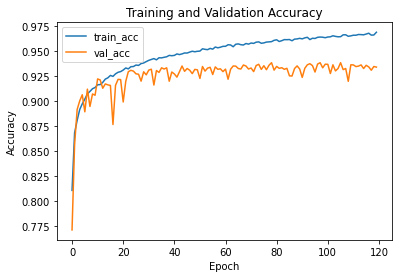

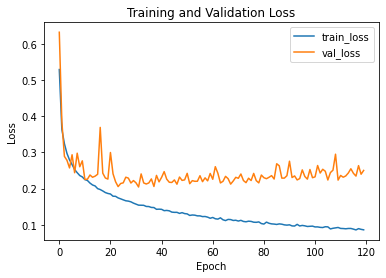

In [15]:
plt.figure()
plt.plot(np.arange(0,epocas),train_model.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,epocas),train_model.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,epocas),train_model.history["loss"],label="train_loss") 
plt.plot(np.arange(0,epocas),train_model.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [20]:
a = model.evaluate(x_test,y_test)
print("Precisión: ", a[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2503 - accuracy: 0.9338
Precisión:  0.9337999820709229
